# Principle Components Analysis

Principle components analysis (PCA) is a dimensionality reduction algorithm. Given a set of $\{x^{(1)},x^{(2)}, \dots x^{(n)}\}$, the aim of the algorithm is to take some $x^{(i)} \in \mathbb{R}^n$ and map it to some $c^{(i)} \in \mathbb{R}^l$ where $l \lt n$. This way it takes less memory to store the data.<br>
We want to define some function to encode $f(x)=c$ and another function to decode $x \approx g(f(x))$<br>

For simplicity we choose the decode function to be merely a matrix multiplication that map the code in $\mathbb{R}^l$ back to $\mathbb{R}^n$. Let $g(c) = \mathbf{D}c$ where $\mathbf{D} \in \mathbb{R}^{n \times l}$ is the matrix defining the decoding.<br>

Computing the optimal code for this decoder is difficult; to make it easy we should constrain the columns of $\mathbf{D}$ to be orthogonal.<br>
The matrix $\mathbf{D}$ in the PCA decoding function is a matrix that maps the encoded data $c$ back to its original representation. If $\mathbf{D}$ is not orthogonal, then it is possible to find a code $c$ that maps to a different original representation than the one it was intended to represent. This is because the columns of $\mathbf{D}$ are not orthogonal, so they can be linearly dependent. This means that it is possible to find a linear combination of the columns of $\mathbf{D}$ that is equal to zero, but that does not correspond to any real data point. This linear combination can then be used to create a code $c$ that maps to a different original representation than the one it was intended to represent.<br>

We should also, constrain all the columns of matrix $\mathbf{D}$ to have a unit norm.
If we do not constrain the columns of $\mathbf{D}$ to have a unit norm, then there will be many possible solutions to the PCA decoding function. This is because we can increase the scale of any column of $\mathbf{D}$ without changing the decoded representation.<br>
For example, let's say we have a column of $\mathbf{D}$ that represents the first principal component of the data. If we increase the scale of this column by 2, then we will also need to decrease the code c for all points by 2. This will ensure that the decoded representation of all points remains the same.<br>
<br>
Let's try to generate the optimal codes $\mathbf{c^*}$ for each point $x$. To find the optimal code we should minimize the distance between $\mathbf{c^*}$ and its reconstruction, $g(\mathbf{c^*})$. To do that we use squared $L^2$ norm.
$$
\begin{gather}
    \mathbf{c^*} = \underset{c}{arg\ min}\parallel{x - g(c)}\parallel_2^2
\end{gather}
$$

The function that we are minimizing is
$$
\begin{gather}
    (x - g(c))^\top(x - g(c)) \\
    = x^\top x - x^\top g(c) - g(c)^\top x + g(c)^\top g(c)\\
    = x^\top x - 2x^\top g(c) + g(c)^\top g(c)
\end{gather}
$$

Since we are minimizing the above function, we can omit the first term since it does not depend on $\mathbf{c}$

$$
\begin{gather}
    \mathbf{c^*} = \underset{c}{arg\ min} -2x^\top g(c) + g(c)^\top g(c)
\end{gather}
$$

given $g(c) = \mathbf{D}c$

$$
\begin{gather}
    \mathbf{c^*} = \underset{c}{arg\ min} -2x^\top \mathbf{D}c + c^\top\mathbf{D}^\top \mathbf{D}c\\
    = \underset{c}{arg\ min} -2x^\top \mathbf{D}c + c^\top\mathbf{I}_lc
\end{gather}
$$

If $\mathbf{D}$ is an orthogonal matrix, then $\mathbf{D}^\top \mathbf{D}$ is the identity matrix. This is because the columns of $\mathbf{D}$ are orthogonal to each other, so the product of any column of $\mathbf{D}$ with its transpose is equal to the identity matrix.

$$
\begin{gather}
    = \underset{c}{arg\ min} -2x^\top \mathbf{D}c + c^\top c
\end{gather}
$$

Let's now solve the optimization problem

$$
\begin{gather}
    \nabla_c(-2x^\top\mathbf{D}c + c^\top c) = \mathbf{0} \\
    -2\mathbf{D}^\top x + 2c = \mathbf{0}\\
    c = \mathbf{D}^\top x
\end{gather}
$$

We can optimally encode $x$ using a matrix-vector multiplication
$$
\begin{gather}
    f(x) = \mathbf{D}^\top x
\end{gather}
$$

Let's now try to define the reconstruction operation

$$
\begin{gather}
    r(x) = g(f(x)) = \mathbf{D}\mathbf{D}^\top x
\end{gather}
$$

Next, we need to choose matrix $\mathbf{D}$. To do so we revisit the idea of minimizing the $L^2$ distance between inputs and reconstructions. Since the same matrix $\mathbf{D}$ is used to decode all the points, we can no longer consider the points in isolation. Instead we minimize the Frobenius norm of the matrix of errors computed over all dimensions and all points:
$$
\begin{gather}
    \mathbf{D^*} = \underset{D}{arg\ min}\sqrt{\sum_{i, j}\bigg(x_j^{(i)}-r(x^{(i)})_j\bigg)^2} & \text{Subject to } \mathbf{D}^\top\mathbf{D}=\mathbf{I}_l
\end{gather}
$$

The constraint $\mathbf{D}^\top\mathbf{D}=\mathbf{I}_l$​ means that the columns of matrix $\mathbf{D}$ are orthonormal. This means that each column has a magnitude of 1 and is orthogonal to all other columns. This constraint is used to ensure that the principal components are uncorrelated and have unit variance.<br>

Let's start by considering the case where $l = 1$; in this case $\mathbf{D}$ is just a vector $\mathbf{d}$:
$$
\begin{gather}
    \mathbf{d^*} = \underset{\mathbf{d}}{arg\ min}\sum_i{\parallel x^{(i)} - \mathbf{dd}^\top x^{(i)} \parallel_2^2} & \text{subject to} \parallel \mathbf{d} \parallel_2 = 1
\end{gather}
$$

Since $\mathbf{d}^\top x^{(i)}$ is a scalar and coefficient to $\mathbf{d}$, we'd like it to be on the left of the vector $\mathbf{d}$:
$$
\begin{gather}
    \mathbf{d^*} = \underset{\mathbf{d}}{arg\ min}\sum_i{\parallel x^{(i)} - \mathbf{d}^\top x^{(i)}\mathbf{d} \parallel_2^2} & \text{subject to} \parallel \mathbf{d} \parallel_2 = 1
\end{gather}
$$
since scalar is its own transpose:
$$
\begin{gather}
    \mathbf{d^*} = \underset{\mathbf{d}}{arg\ min}\sum_i{\parallel x^{(i)} - x^{(i)\top} \mathbf{d}\mathbf{d} \parallel_2^2} & \text{subject to} \parallel \mathbf{d} \parallel_2 = 1
\end{gather}
$$

Let's stack each example to form a matrix $\mathbf{X} \in \mathbb{R}^{m\times n}$ where $\mathbf{X_{i, :}} = x^{(i)^\top}$:
$$
\begin{gather}
    \mathbf{d^*} = \underset{\mathbf{d}}{arg\ min}{\parallel \mathbf{X} - \mathbf{X}\mathbf{d}\mathbf{d}^\top \parallel_F^2} & \text{subject to } \mathbf{d}^\top \mathbf{d} = 1
\end{gather}
$$
Disregarding the constraint
$$
\begin{gather}
    \underset{\mathbf{d}}{arg\ min}{\parallel \mathbf{X} - \mathbf{X}\mathbf{d}\mathbf{d}^\top \parallel_F^2}\\
    = \underset{\mathbf{d}}{arg\ min}\ Tr\bigg(\big(\mathbf{X} - \mathbf{X}\mathbf{d}\mathbf{d}^\top\big)^\top\big(\mathbf{X} - \mathbf{X}\mathbf{d}\mathbf{d}^\top\big)\bigg)\\
    = \underset{\mathbf{d}}{arg\ min}\ Tr{(\mathbf{X}^\top\mathbf{X}-\mathbf{X}^\top\mathbf{X}dd^\top-dd^\top\mathbf{X}^\top\mathbf{X}+dd^\top\mathbf{X}^\top\mathbf{X}dd^\top)}\\
    = \underset{\mathbf{d}}{arg\ min}\ Tr{(\mathbf{X}^\top\mathbf{X})}-\ Tr{(\mathbf{X}^\top\mathbf{X}dd^\top)}-\ Tr{(dd^\top\mathbf{X}^\top\mathbf{X})}+\ Tr{(dd^\top\mathbf{X}^\top\mathbf{X}dd^\top)}
\end{gather}
$$
(Remove the terms that does not involve $\mathbf{d}$)
$$
\begin{gather}
    = \underset{\mathbf{d}}{arg\ min}-\ Tr{(\mathbf{X}^\top\mathbf{X}dd^\top)}-\ Tr{(dd^\top\mathbf{X}^\top\mathbf{X})}+\ Tr{(dd^\top\mathbf{X}^\top\mathbf{X}dd^\top)}
\end{gather}
$$

(We can cycle the order of matrices inside a trace)
$$
\begin{gather}
    = \underset{\mathbf{d}}{arg\ min}-2\ Tr{(\mathbf{X}^\top\mathbf{X}dd^\top)}+\ Tr{(dd^\top\mathbf{X}^\top\mathbf{X}dd^\top)}\\
    = \underset{\mathbf{d}}{arg\ min}-2\ Tr{(\mathbf{X}^\top\mathbf{X}dd^\top)}+\ Tr{(\mathbf{X}^\top\mathbf{X}dd^\top dd^\top)}
\end{gather}
$$
(Re-introducing the constraints)
$$
\begin{gather}
    = \underset{\mathbf{d}}{arg\ min}-2\ Tr{(\mathbf{X}^\top\mathbf{X}dd^\top)}+\ Tr{(\mathbf{X}^\top\mathbf{X}dd^\top dd^\top)} & \text{subject to } \mathbf{d}^\top\mathbf{d} = 1\\ 
    = \underset{\mathbf{d}}{arg\ min}-2\ Tr{(\mathbf{X}^\top\mathbf{X}dd^\top)}+\ Tr{(\mathbf{X}^\top\mathbf{X}dd^\top)} & \text{subject to } \mathbf{d}^\top\mathbf{d} = 1\\
    = \underset{\mathbf{d}}{arg\ min}-\ Tr{(\mathbf{X}^\top\mathbf{X}dd^\top)}& \text{subject to } \mathbf{d}^\top\mathbf{d} = 1\\
    = \underset{\mathbf{d}}{arg\ max}\ Tr{(\mathbf{X}^\top\mathbf{X}dd^\top)}& \text{subject to } \mathbf{d}^\top\mathbf{d} = 1\\
    = \underset{\mathbf{d}}{arg\ max}\ Tr{(d^\top\mathbf{X}^\top\mathbf{X}d)}& \text{subject to } \mathbf{d}^\top\mathbf{d} = 1
\end{gather}
$$

Optimization problem can be solved using eigendecomposition. In this case optimal $\mathbf{d}$ is given by the eigenvector of $\mathbf{X}^\top \mathbf{X}$ corresponding to the largest eigenvalue.
Since we let $l=1$, we only decode the first component. For more matrix $\mathbf{D}$ will be given by $l$ eigenvectors corresponding to the largest eigenvalues.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

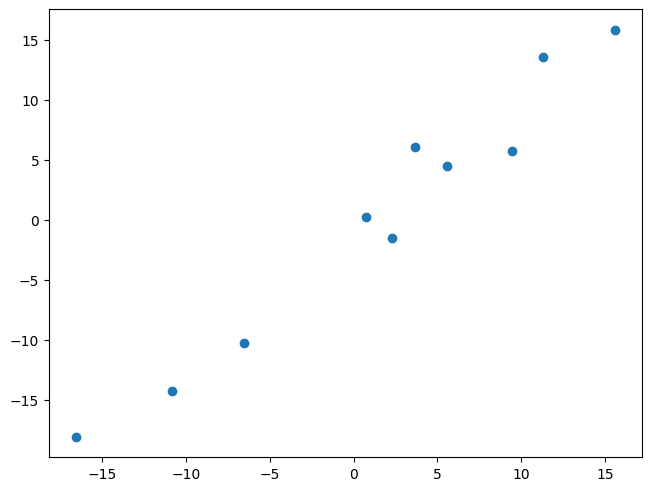

In [3]:
x_1 = np.random.randn(10) * 10
x_2 = x_1 + np.random.randn(10) * 2
fig, ax = plt.subplots(layout='constrained');
ax.scatter(x_1, x_2);

In [4]:
X = np.hstack((x_1.reshape(-1, 1), x_2.reshape(-1, 1)), dtype='float32')

## Mean normalization

In [5]:
mu = np.mean(X, axis=0)
std = np.std(X, axis=0)
X_norm = (X - mu) / std

## PCA

In [6]:
sigma = (X_norm.T @ X_norm)

In [7]:
U, S, V = np.linalg.svd(sigma)

In [8]:
Ureduce = U[:, 0].reshape(-1, 1)

In [9]:
def f(x):
    return Ureduce.T @ x

C = f(X_norm.T)

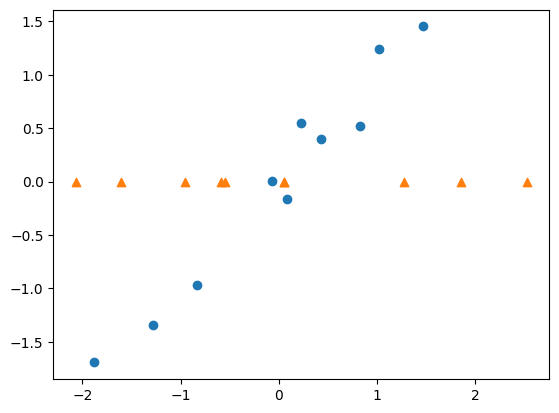

In [10]:
fig, ax = plt.subplots()
ax.scatter(X_norm[:, 0], X_norm[:, 1]);
ax.scatter(C, np.zeros_like(C), marker='^');

## What $k$ should we choose?
We should try PCA with $k=\alpha$, where $1 \le\alpha $ and compute $c$ which is the encoded version of $x$ then check if
$$
\begin{gather}
    \frac{\frac{1}{m}\sum_{i=1}^{m}\parallel x^{(i)} - c^{(i)} \parallel^2}{\frac{1}{m}\sum_{i=1}^{m}\parallel x^{(i)} \parallel^2} \le 0.01
\end{gather}
$$

Where $m$ is the number of examples and $n$ is the number of the dimensionality of each example and $k$ is the number of the new dimensionality.<br>
We should try $k=1\dots n$ to see which satisfy the inequality.
<br>
There is more efficient way to find the best $k$. Calculation of `U, S, V = svd(sigma)` where `sigma` is $\Sigma = \mathbf{X}^\top\mathbf{X}$ results another matrix `S` which is a diagonal matrix.
$$
S = 
\begin{bmatrix}
    s_{11} & 0 & 0 & \dots & 0 \\
    0 & s_{22} & 0 & \dots & 0 \\
    0 & 0 & s_{33} & \dots & 0\\
    \vdots & \vdots & \vdots & \vdots & \vdots\\
    0 & 0 & 0 & \dots & s_{nn}\\
\end{bmatrix}
$$
<br>
Now we need to check
$$
\begin{gather}
    1 - \frac{\sum_{i=1}^{k}\mathbf{S}_{ii}}{\sum_{i=1}^{n}\mathbf{S}_{ii}} \le 0.01
\end{gather}
$$
In this case we say "99% of variance retained"

In [11]:
retain_var = 1 - np.sum(S[:1]) / np.sum(S)
print(f'{(1 - retain_var) * 100:0.3}% variane retained')

99.1% variane retained


## Decoding

In [12]:
def g(c):
    return Ureduce @ c

X_approx = g(C).T

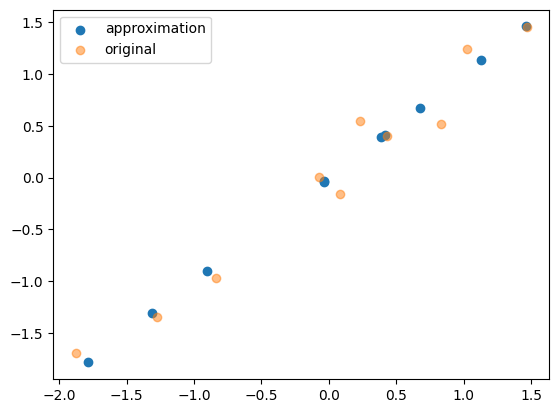

In [13]:
fig, ax = plt.subplots()
ax.scatter(X_approx[:, 0], X_approx[:, 1], label='approximation')
ax.scatter(X_norm[:, 0], X_norm[:, 1], label='original', alpha=0.5);
ax.legend()

_References_<br>
<i>[Deep Learning; Ian Goodfellow, Yoshua Bengio, Aaron Courville]</i>